In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns


plt.rc('font',size=14)
sns.set(style='white')
sns.set(style='whitegrid',color_codes=True)
#To enable plotting graphs in Jupyter notebook


from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import VotingRegressor
from sklearn.decomposition import PCA
from scipy import stats
from scipy.stats import zscore
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency
from sklearn.metrics import precision_recall_curve, auc, roc_auc_score
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score

In [4]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score,accuracy_score

In [5]:
df_dummies = pd.read_csv('df_dummies.csv')
df_dummies

,Unnamed: 0,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0,5000.0,0.0,10.65,162.87,6.0,10.0,24000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
1,1,2500.0,1.0,15.27,59.83,13.0,0.0,30000.0,2011,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2400.0,0.0,15.96,84.33,14.0,10.0,12252.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
3,3,10000.0,0.0,13.49,339.31,10.0,10.0,49200.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
4,4,3000.0,1.0,12.69,67.79,9.0,1.0,80000.0,2011,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,42531,3500.0,0.0,10.28,113.39,10.0,0.0,180000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42531,42532,1000.0,0.0,9.64,32.11,8.0,0.0,12000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42532,42533,2525.0,0.0,9.33,80.69,7.0,0.0,110000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0
42533,42534,6500.0,0.0,8.38,204.84,4.0,0.0,60000.0,2007,1,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_dummies.drop('Unnamed: 0', axis=1, inplace=True)
df_dummies

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,0.0,10.65,162.87,6.0,10.0,24000.0,2011,1,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,1.0,15.27,59.83,13.0,0.0,30000.0,2011,0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,0.0,15.96,84.33,14.0,10.0,12252.0,2011,1,8.72,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,0.0,13.49,339.31,10.0,10.0,49200.0,2011,1,20.00,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,1.0,12.69,67.79,9.0,1.0,80000.0,2011,1,17.94,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,0.0,10.28,113.39,10.0,0.0,180000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42531,1000.0,0.0,9.64,32.11,8.0,0.0,12000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42532,2525.0,0.0,9.33,80.69,7.0,0.0,110000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42533,6500.0,0.0,8.38,204.84,4.0,0.0,60000.0,2007,1,4.00,...,0,0,0,0,0,0,0,0,0,0


In [7]:
X = df_dummies.drop('loan_status', axis=1)
y = df_dummies['loan_status']

In [8]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-0.82173051, -0.59064503, -0.40859218, ..., -0.11081588,
        -0.06645143, -0.04527214],
       [-1.15907367,  1.69306429,  0.83739883, ..., -0.11081588,
        -0.06645143, -0.04527214],
       [-1.1725674 , -0.59064503,  1.0234884 , ..., -0.11081588,
        -0.06645143, -0.04527214],
       ...,
       [-1.15570024, -0.59064503, -0.76458961, ..., -0.11081588,
        -0.06645143, -0.04527214],
       [-0.61932461, -0.59064503, -1.02079988, ..., -0.11081588,
        -0.06645143, -0.04527214],
       [-0.82173051, -0.59064503, -1.19070775, ..., -0.11081588,
        -0.06645143, -0.04527214]])

In [9]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,-0.821731,-0.590645,-0.408592,-0.764644,-0.622967,1.368233,-0.704226,0.795288,2.122578,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
1,-1.159074,1.693064,0.837399,-1.257836,0.366964,-1.399123,-0.610611,0.795288,-1.839520,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
2,-1.172567,-0.590645,1.023488,-1.140569,0.508382,1.368233,-0.887523,0.795288,-0.691775,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
3,-0.147044,-0.590645,0.357342,0.079871,-0.057292,1.368233,-0.311045,0.795288,0.985240,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
4,-1.091605,1.693064,0.141586,-1.219736,-0.198711,-1.122388,0.169509,0.795288,0.678977,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,-1.024136,-0.590645,-0.508379,-1.001476,-0.057292,-1.399123,1.729751,-3.343908,-0.501476,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
42531,-1.361480,-0.590645,-0.680984,-1.390515,-0.340130,-1.399123,-0.891455,-3.343908,-0.501476,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
42532,-1.155700,-0.590645,-0.764590,-1.157991,-0.481548,-1.399123,0.637582,-3.343908,-0.501476,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272
42533,-0.619325,-0.590645,-1.020800,-0.563758,-0.905804,-1.399123,-0.142539,-3.343908,-1.393505,-0.297409,...,-0.03972,-0.027439,-0.271245,-0.08111,-0.190331,-0.036632,-0.146021,-0.110816,-0.066451,-0.045272


In [10]:
pca=PCA(random_state=42) 
pca.fit(X_scaled)

PCA(random_state=42)

In [11]:
pca.components_[0]

array([ 3.56118980e-01,  1.89899013e-01,  1.72725668e-01,  3.28690220e-01,
        1.66176361e-01,  1.69216095e-01,  1.93396627e-01,  9.38685257e-02,
        1.14915527e-01,  2.15916708e-02, -2.45520209e-01,  2.53123757e-02,
        2.31886969e-02,  2.20723252e-01,  1.65017251e-02,  2.19330394e-01,
        8.73986551e-02,  2.80923792e-01,  2.33745401e-02, -3.07667174e-03,
        2.75891761e-02,  2.57191884e-01, -2.56085962e-03, -1.19131720e-01,
       -1.55246065e-01,  2.30936831e-01, -7.50559097e-03, -8.34529300e-03,
       -1.86398768e-02, -2.18805197e-01, -1.88058440e-01, -4.10818669e-02,
        2.38557441e-01, -5.03719050e-02,  1.67913240e-02,  9.81096653e-02,
       -4.69656213e-02,  4.19773557e-02, -2.34582281e-03, -6.21507406e-02,
       -1.97187951e-02, -5.26567099e-02, -8.33014760e-02, -6.26190160e-04,
        2.69154511e-02, -3.30668337e-02, -3.36018573e-02,  8.44064777e-03,
        9.01600465e-03,  3.50848271e-03,  4.79084358e-03, -1.93514228e-02,
       -2.01757730e-03,  

In [12]:
pca.explained_variance_ratio_

array([4.50832017e-02, 4.26994017e-02, 2.45746558e-02, 2.01801202e-02,
       1.89587160e-02, 1.70988956e-02, 1.58844077e-02, 1.48253027e-02,
       1.40322171e-02, 1.35464780e-02, 1.28705985e-02, 1.21926453e-02,
       1.20027056e-02, 1.17155431e-02, 1.15477207e-02, 1.13649301e-02,
       1.12552995e-02, 1.11436708e-02, 1.10907506e-02, 1.10220297e-02,
       1.09873788e-02, 1.09638508e-02, 1.08755847e-02, 1.08232462e-02,
       1.07697401e-02, 1.07443503e-02, 1.07068437e-02, 1.06966349e-02,
       1.06712780e-02, 1.06558300e-02, 1.06355265e-02, 1.06092014e-02,
       1.05809191e-02, 1.05562792e-02, 1.05362426e-02, 1.05220366e-02,
       1.05011883e-02, 1.04875366e-02, 1.04771606e-02, 1.04659545e-02,
       1.04585094e-02, 1.04370052e-02, 1.04246720e-02, 1.04096351e-02,
       1.04038895e-02, 1.03958960e-02, 1.03869727e-02, 1.03775109e-02,
       1.03673702e-02, 1.03619848e-02, 1.03608666e-02, 1.03563165e-02,
       1.03397955e-02, 1.03335841e-02, 1.03231202e-02, 1.03211784e-02,
      

In [13]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.0450832 , 0.0877826 , 0.11235726, 0.13253738, 0.1514961 ,
       0.16859499, 0.1844794 , 0.1993047 , 0.21333692, 0.2268834 ,
       0.23975399, 0.25194664, 0.26394935, 0.27566489, 0.28721261,
       0.29857754, 0.30983284, 0.32097651, 0.33206726, 0.34308929,
       0.35407667, 0.36504052, 0.3759161 , 0.38673935, 0.39750909,
       0.40825344, 0.41896028, 0.42965692, 0.4403282 , 0.45098403,
       0.46161955, 0.47222876, 0.48280967, 0.49336595, 0.5039022 ,
       0.51442423, 0.52492542, 0.53541296, 0.54589012, 0.55635607,
       0.56681458, 0.57725159, 0.58767626, 0.59808589, 0.60848978,
       0.61888568, 0.62927265, 0.63965016, 0.65001753, 0.66037952,
       0.67074039, 0.6810967 , 0.6914365 , 0.70177008, 0.7120932 ,
       0.72241438, 0.73272698, 0.74303492, 0.75333862, 0.76362255,
       0.7738827 , 0.78413897, 0.79438128, 0.80456989, 0.81471826,
       0.8248591 , 0.83492463, 0.8449541 , 0.8549522 , 0.86494285,
       0.87483225, 0.88464221, 0.89438109, 0.90383658, 0.91283

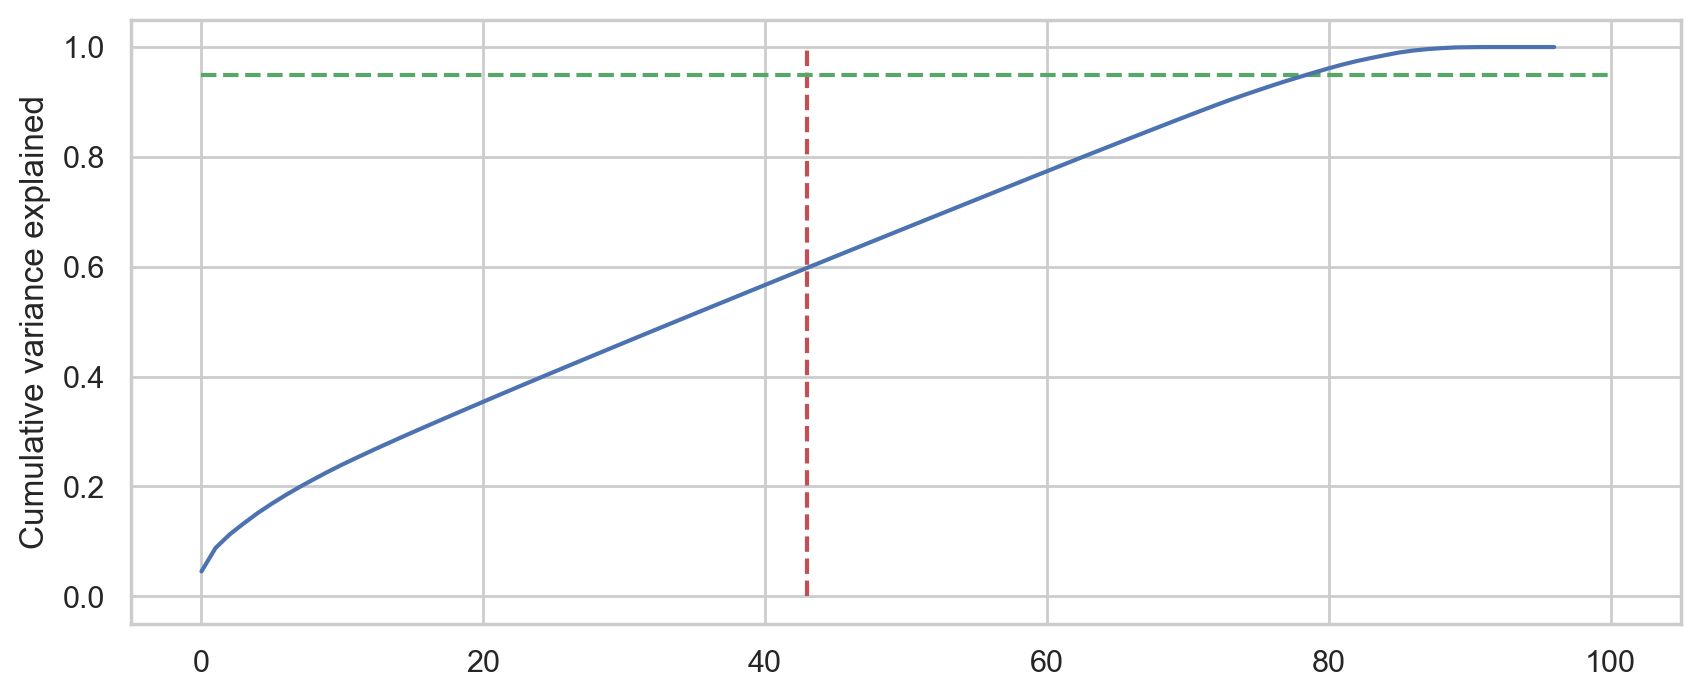

In [14]:
fig = plt.figure(figsize=[10,4],dpi=200)
plt.vlines(x=43, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=100, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [15]:
pca_final = PCA(n_components=43, random_state=67)
X_pca_final = pca_final.fit_transform(X_scaled)

print(pca_final.explained_variance_ratio_)

[0.04508318 0.04269935 0.02457038 0.02016089 0.01894182 0.0170485
 0.01579657 0.01474889 0.01385778 0.0133926  0.01256709 0.01186325
 0.01176547 0.01144083 0.01130592 0.01116524 0.01109523 0.01098781
 0.01091918 0.01086149 0.01080354 0.01078159 0.01070354 0.01066344
 0.01059841 0.01057975 0.01054324 0.01052384 0.01050006 0.01048986
 0.01047044 0.01045805 0.01042767 0.01039697 0.01038485 0.01037999
 0.01035945 0.01034842 0.01032493 0.01030288 0.01026546 0.01026008
 0.0102275 ]


In [16]:
print(X.shape)
print(X_pca_final.shape)

(42535, 97)
(42535, 43)


In [17]:
X = X_pca_final
y = df_dummies['loan_status']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [19]:
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (29774, 43)
X_test:  (12761, 43)
y_train:  (29774,)
y_test:  (12761,)


REGRESJA LOGIISTYCZNA

In [20]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)

print(classification_report(y_test, lr_pred))
print(confusion_matrix(y_test, lr_pred))

print('Training accuracy:', lr.score(X_train, y_train))
print('Test accuracy:', lr.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.59      0.07      0.13      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.72      0.53      0.52     12761
weighted avg       0.81      0.85      0.79     12761

[[  144  1834]
 [   99 10684]]
Training accuracy: 0.8515147444078727
Test accuracy: 0.8485228430373796


In [21]:
auroc_lr = roc_auc_score(lr_pred, y_test)
print('AUROC =', auroc_lr)

AUROC = 0.723041782795737


DECISION TREE

In [22]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

dt_pred = dt.predict(X_test)

print(classification_report(y_test, dt_pred))
print(confusion_matrix(y_test, dt_pred))

print('Training accuracy:', dt.score(X_train, y_train))
print('Test accuracy:', dt.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.26      0.27      0.27      1978
           1       0.87      0.86      0.86     10783

    accuracy                           0.77     12761
   macro avg       0.56      0.57      0.56     12761
weighted avg       0.77      0.77      0.77     12761

[[ 543 1435]
 [1553 9230]]
Training accuracy: 1.0
Test accuracy: 0.7658490713893895


In [23]:
auroc_dt = roc_auc_score(dt_pred, y_test)
print('AUROC =', auroc_dt)

AUROC = 0.5622563058517016


RANDOM FOREST

In [24]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

rf_pred = rf.predict(X_test)

print(classification_report(y_test, rf_pred))
print(confusion_matrix(y_test, rf_pred))

print('Training accuracy:', rf.score(X_train, y_train))
print('Test accuracy:', rf.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.67      0.06      0.11      1978
           1       0.85      0.99      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.76      0.53      0.51     12761
weighted avg       0.82      0.85      0.79     12761

[[  118  1860]
 [   59 10724]]
Training accuracy: 1.0
Test accuracy: 0.849619935741713


In [25]:
auroc_rf = roc_auc_score(rf_pred, y_test)
print('AUROC =', auroc_rf)

AUROC = 0.7594299639754187


SUPPORT VECTOR MACHINE (SVM)

In [26]:
sv = SVC()
sv.fit(X_train,y_train)
sv_pred = sv.predict(X_test)

print(classification_report(y_test, sv_pred))
print(confusion_matrix(y_test, sv_pred))

print('Training accuracy:', sv.score(X_train, y_train))
print('Test accuracy:', sv.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.73      0.05      0.09      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.79      0.52      0.50     12761
weighted avg       0.83      0.85      0.79     12761

[[   93  1885]
 [   34 10749]]
Training accuracy: 0.8595754685295895
Test accuracy: 0.849619935741713


In [27]:
auroc_sv = roc_auc_score(sv_pred, y_test)
print('AUROC =', auroc_sv)

AUROC = 0.7915414473380792


In [28]:
sv.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

K NEAREST NEIGHBORS (KNN)

In [29]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)

print(classification_report(y_test, knn_pred))
print(confusion_matrix(y_test, knn_pred))

print('Training accuracy:', knn.score(X_train, y_train))
print('Test accuracy:', knn.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.37      0.05      0.09      1978
           1       0.85      0.98      0.91     10783

    accuracy                           0.84     12761
   macro avg       0.61      0.52      0.50     12761
weighted avg       0.77      0.84      0.78     12761

[[  103  1875]
 [  178 10605]]
Training accuracy: 0.8612883724054544
Test accuracy: 0.8391191912859494


In [30]:
auroc_knn = roc_auc_score(knn_pred, y_test)
print('AUROC =', auroc_knn)

AUROC = 0.6081538290446209


BAGGING CLASSIFIER

In [31]:
from sklearn import tree
xgbc = BaggingClassifier(tree.DecisionTreeClassifier(random_state=1))
xgbc.fit(X_train,y_train)
xgbc_prediction = xgbc.predict(X_test)

print(classification_report(y_test, xgbc_prediction)) 
print(confusion_matrix(y_test, xgbc_prediction))
print('Training accuracy:', xgbc.score(X_train, y_train))
print('Test accuracy:', xgbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.39      0.19      0.26      1978
           1       0.86      0.95      0.90     10783

    accuracy                           0.83     12761
   macro avg       0.63      0.57      0.58     12761
weighted avg       0.79      0.83      0.80     12761

[[  379  1599]
 [  589 10194]]
Training accuracy: 0.9935850070531336
Test accuracy: 0.8285400830655905


In [32]:
auroc_xgbc = roc_auc_score(xgbc_prediction, y_test)
print('AUROC =', auroc_xgbc)

AUROC = 0.6279700084725985


GRADIENT BOOSTING CLASSIFIER

In [33]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc.fit(X_train, y_train)
gbc_prediction = gbc.predict(X_test)

print(classification_report(y_test, gbc_prediction)) 
print(confusion_matrix(y_test, gbc_prediction))
print('Training accuracy:', gbc.score(X_train, y_train))
print('Test accuracy:', gbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1978
           1       0.84      1.00      0.92     10783

    accuracy                           0.84     12761
   macro avg       0.42      0.50      0.46     12761
weighted avg       0.71      0.84      0.77     12761

[[    0  1978]
 [    0 10783]]
Training accuracy: 0.8504399811916438
Test accuracy: 0.8449964736305932


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# nie liczy się

auroc_gbc = roc_auc_score(gbc_prediction, y_test)
print('AUROC =', auroc_gbc)

Ogólnie wyniki AUROC po PCA są słabsze.

Najlepszy wynik wyszedł na modelu SVM z parametrami domyślnymi - 79%

Ostatecznie wybieram więc model Gradient Boosting Classifier bez PCA na zbiorze dużym z wynikiem AUROC 83% i zrobię 

walidację krzyżową

In [37]:
df_dummies = pd.read_csv('df_dummies.csv') 
df_dummies.drop('Unnamed: 0', axis=1, inplace=True) 
df_dummies

,loan_amnt,term,int_rate,installment,sub_grade,emp_length,annual_inc,issue_d,loan_status,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,5000.0,0.0,10.65,162.87,6.0,10.0,24000.0,2011,1,27.65,...,0,0,0,0,0,0,0,0,0,0
1,2500.0,1.0,15.27,59.83,13.0,0.0,30000.0,2011,0,1.00,...,0,0,0,0,0,0,0,0,0,0
2,2400.0,0.0,15.96,84.33,14.0,10.0,12252.0,2011,1,8.72,...,0,0,0,0,0,0,0,0,0,0
3,10000.0,0.0,13.49,339.31,10.0,10.0,49200.0,2011,1,20.00,...,0,0,0,0,0,0,0,0,0,0
4,3000.0,1.0,12.69,67.79,9.0,1.0,80000.0,2011,1,17.94,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42530,3500.0,0.0,10.28,113.39,10.0,0.0,180000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42531,1000.0,0.0,9.64,32.11,8.0,0.0,12000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42532,2525.0,0.0,9.33,80.69,7.0,0.0,110000.0,2007,1,10.00,...,0,0,0,0,0,0,0,0,0,0
42533,6500.0,0.0,8.38,204.84,4.0,0.0,60000.0,2007,1,4.00,...,0,0,0,0,0,0,0,0,0,0


In [38]:
X = df_dummies.drop('loan_status', axis=1)
Y = df_dummies['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

In [39]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_test

array([[-0.95313026, -0.59377133,  1.03360482, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [-1.22287358, -0.59377133, -0.4798553 , ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299, -0.59377133, -1.61360389, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       ...,
       [ 0.28768898, -0.59377133, -1.49241936, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.66532962,  1.68415002,  2.08656372, ..., -0.10937932,
        -0.06622215, -0.0456804 ],
       [ 0.12584299, -0.59377133,  0.25533084, ..., -0.10937932,
        -0.06622215, -0.0456804 ]])

In [40]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
gbc.fit(X_train, y_train)
gbc_prediction = gbc.predict(X_test)

print(classification_report(y_test, gbc_prediction)) 
print(confusion_matrix(y_test, gbc_prediction))
print('Training accuracy:', gbc.score(X_train, y_train))
print('Test accuracy:', gbc.score(X_test, y_test))

              precision    recall  f1-score   support

           0       0.81      0.06      0.10      1978
           1       0.85      1.00      0.92     10783

    accuracy                           0.85     12761
   macro avg       0.83      0.53      0.51     12761
weighted avg       0.85      0.85      0.79     12761

[[  110  1868]
 [   26 10757]]
Training accuracy: 0.8575602874991604
Test accuracy: 0.8515790298565943


In [41]:
auroc_gbc = roc_auc_score(gbc_prediction,y_test) 
print('AUROC =', auroc_gbc)

AUROC = 0.8304315666860803


In [42]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

In [43]:
cv = ShuffleSplit(n_splits=100, test_size=0.3, random_state=0)

/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


<Figure size 1440x1008 with 0 Axes>

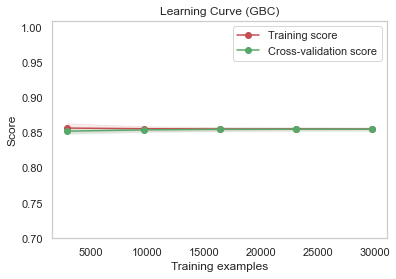

In [44]:
gbc= GradientBoostingClassifier(learning_rate=0.01, random_state=1)
plt.figure(figsize=(20,14))
plot_learning_curve(gbc, 'Learning Curve (GBC)', X, y, (0.7, 1.01), cv=cv, n_jobs=4)
plt.show()

In [47]:
num_folds = 18
kfold = KFold(n_splits=num_folds) 
results = cross_val_score(gbc,X, y, cv=kfold) 
accuracy=np.mean(abs(results))
print('Average accuracy: ',accuracy) 
print('Standard Deviation: ',results.std())

Average accuracy:  0.8557662777909454
Standard Deviation:  0.0352216027446583
